Credits : https://www.youtube.com/watch?v=4jv1NGlAc_0&t=607s

# IMPORTS

In [19]:
import pandas_datareader as web
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tsa.vector_ar.var_model import VAR
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = 20, 15
import numpy as np
import pandas as pd


In [20]:
# Load datasets
df = pd.read_csv('Tatacoffee13_21.csv',index_col=0, parse_dates=True)

sp = pd.read_csv('varforecasted_28.csv',index_col=0, parse_dates=True)


# Data

In [21]:
df

,Open,High,Low,Close
Date,,,,
2013-01-01,1410.60,1427.90,1408.30,1415.10
2013-01-02,1421.00,1626.60,1416.15,1607.40
2013-01-03,1632.55,1673.90,1613.05,1626.20
2013-01-04,1627.75,1627.75,1574.60,1579.05
2013-01-07,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2021-12-22,202.90,207.80,201.35,205.00
2021-12-23,206.00,206.85,202.05,202.95
2021-12-24,203.90,203.90,199.35,201.00


In [22]:
ticker = 'GOOG'

df = web.get_data_yahoo(ticker, start='2000')
df = df.filter(['High', 'Low'])
df

,High,Low
Date,,
2004-08-19,51.835709,47.800831
2004-08-20,54.336334,50.062355
2004-08-23,56.528118,54.321388
2004-08-24,55.591629,51.591621
2004-08-25,53.798351,51.746044
...,...,...
2022-04-06,2796.969971,2728.362061
2022-04-07,2754.030029,2697.145020
2022-04-08,2725.000000,2675.050049


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4444 entries, 2004-08-19 to 2022-04-12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    4444 non-null   float64
 1   Low     4444 non-null   float64
dtypes: float64(2)
memory usage: 104.2 KB


In [24]:
print(f'p-values of High and Low are : \
{adfuller(df.High.diff().dropna())[1], adfuller(df.Low.diff().dropna())[1]} respectively. So one \
difference is \nstationary.')


p-values of High and Low are : (1.8814194637701615e-23, 1.301491904798091e-28) respectively. So one difference is 
stationary.


# Train test split

In [25]:
forecast = 12
train, test = df[:-forecast], df[-forecast:]
train.shape, test.shape

((4432, 2), (12, 2))

In [26]:
model = VAR(train.diff().dropna())
sorted_order = model.select_order()
print(sorted_order.summary())

d:\Users\kaasa\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        9.816       9.819   1.832e+04       9.817
1        9.590       9.599   1.462e+04       9.593
2        9.490       9.505   1.323e+04       9.495
3        9.451       9.471   1.272e+04       9.458
4        9.424       9.450   1.238e+04       9.433
5        9.403       9.435   1.212e+04       9.414
6        9.398       9.436   1.207e+04       9.411
7        9.386       9.430   1.192e+04       9.402
8        9.380       9.429   1.185e+04       9.397
9        9.374      9.429*   1.178e+04       9.393
10       9.371       9.432   1.174e+04       9.393
11       9.366       9.433   1.168e+04       9.389
12       9.366       9.438   1.168e+04       9.391
13       9.360       9.438   1.161e+04       9.388
14       9.357       9.441   1.158e+04       9.387
15       9.350       9.440   1.149e+04       9.381
16       9.346       9.442   1.

In [27]:
# Checking if Low is causing the high column
grangercausalitytests(df, maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=193.1788, p=0.0000  , df_denom=4440, df_num=1
ssr based chi2 test:   chi2=193.3093, p=0.0000  , df=1
likelihood ratio test: chi2=189.2222, p=0.0000  , df=1
parameter F test:         F=193.1788, p=0.0000  , df_denom=4440, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=160.6877, p=0.0000  , df_denom=4437, df_num=2
ssr based chi2 test:   chi2=321.7375, p=0.0000  , df=2
likelihood ratio test: chi2=310.6194, p=0.0000  , df=2
parameter F test:         F=160.6877, p=0.0000  , df_denom=4437, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=131.3038, p=0.0000  , df_denom=4434, df_num=3
ssr based chi2 test:   chi2=394.5333, p=0.0000  , df=3
likelihood ratio test: chi2=377.9817, p=0.0000  , df=3
parameter F test:         F=131.3038, p=0.0000  , df_denom=4434, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=105.3881, p=0.

{1: ({'ssr_ftest': (193.1788213094664, 5.065706906639292e-43, 4440.0, 1),
   'ssr_chi2test': (193.3093475400809, 6.025649632318766e-44, 1),
   'lrtest': (189.22215635955217, 4.700231971726048e-43, 1),
   'params_ftest': (193.1788213094759, 5.065706906615752e-43, 4440.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (160.6876562823093, 4.2246017203131654e-68, 4437.0, 2),
   'ssr_chi2test': (321.73746639892624, 1.3664598032638391e-70, 2),
   'lrtest': (310.61936175268784, 3.5470116038865767e-68, 2),
   'params_ftest': (160.6876562823058, 4.224601720326613e-68, 4437.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (131.30381345394852, 1.7140109804290357e-81, 4434.0, 3),
   'ssr_chi2test': (394.5333122794218, 3.382659636447743e-85, 3),
   'lrtest': (377.98172118121147, 1.3005649135856186e-81, 3),
   'params_ftest': (131.30381345394983, 1.7140109804263077e-81, 4434.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0.

So Low is causing High column.

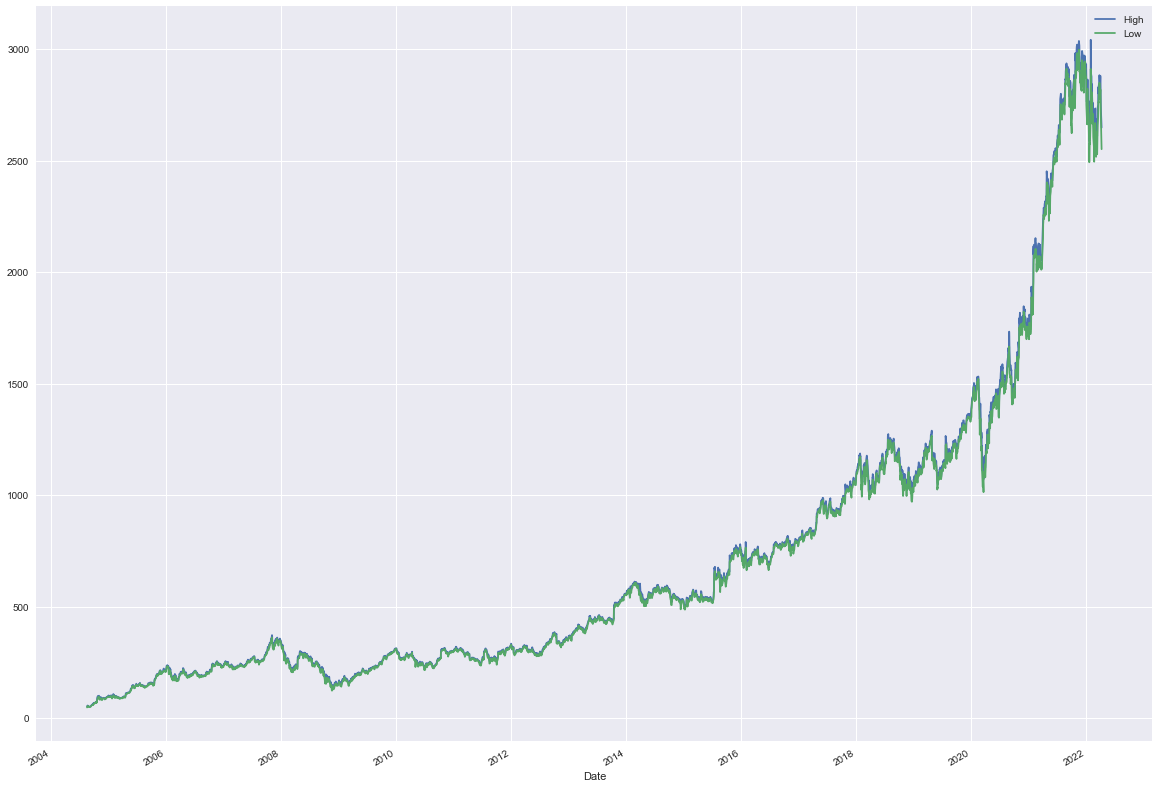

In [28]:
df.plot()

In [29]:
grangercausalitytests(df[['Low', 'High']], maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=87.8756 , p=0.0000  , df_denom=4440, df_num=1
ssr based chi2 test:   chi2=87.9350 , p=0.0000  , df=1
likelihood ratio test: chi2=87.0761 , p=0.0000  , df=1
parameter F test:         F=87.8756 , p=0.0000  , df_denom=4440, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=88.7370 , p=0.0000  , df_denom=4437, df_num=2
ssr based chi2 test:   chi2=177.6739, p=0.0000  , df=2
likelihood ratio test: chi2=174.2126, p=0.0000  , df=2
parameter F test:         F=88.7370 , p=0.0000  , df_denom=4437, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=59.4643 , p=0.0000  , df_denom=4434, df_num=3
ssr based chi2 test:   chi2=178.6745, p=0.0000  , df=3
likelihood ratio test: chi2=175.1738, p=0.0000  , df=3
parameter F test:         F=59.4643 , p=0.0000  , df_denom=4434, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=42.6286 , p=0.

{1: ({'ssr_ftest': (87.87561605838036, 1.0810871969027696e-20, 4440.0, 1),
   'ssr_chi2test': (87.93499147463602, 6.764142034410759e-21, 1),
   'lrtest': (87.07610940923041, 1.0442435476246973e-20, 1),
   'params_ftest': (87.87561605838248, 1.0810871969016636e-20, 4440.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (88.73697130714021, 1.6323057891695595e-38, 4437.0, 2),
   'ssr_chi2test': (177.67393578828796, 2.6217728064178002e-39, 2),
   'lrtest': (174.2125768502592, 1.4798564778442427e-38, 2),
   'params_ftest': (88.7369713071426, 1.632305789166219e-38, 4437.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (59.46429248028933, 1.1040813310777394e-37, 4434.0, 3),
   'ssr_chi2test': (178.67450805478006, 1.7049257445007882e-38, 3),
   'lrtest': (175.1737950124807, 9.719114295820044e-38, 3),
   'params_ftest': (59.46429248028968, 1.1040813310774725e-37, 4434.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 

And High is causing low column - which was very clear from the graph. In general, A causes B does not mean B would cause A. 

In [30]:
train.diff()

,High,Low
Date,,
2004-08-19,NaN,NaN
2004-08-20,2.500626,2.261524
2004-08-23,2.191784,4.259033
2004-08-24,-0.936489,-2.729767
2004-08-25,-1.793278,0.154423
...,...,...
2022-03-21,13.379883,33.590088
2022-03-22,78.350098,37.770020
2022-03-23,-29.500000,33.330078


In [31]:
# Now we shall fit the model using VARMAX. Reason I took order 4 is order 4 AIC score in 
#print(sorted_order.summary())
# seem pretty close to at order 31 - the smallest one. So we try. 
var = VARMAX(train, enforce_stationarity=True)
fitted = var.fit(disp=False)
print(fitted.summary())

d:\Users\kaasa\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
d:\Users\kaasa\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Users\kaasa\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                           Statespace Model Results                           
Dep. Variable:        ['High', 'Low']   No. Observations:                 4432
Model:                         VAR(1)   Log Likelihood              -59925.549
                          + intercept   AIC                         119869.098
Date:                Wed, 13 Apr 2022   BIC                         119926.668
Time:                        10:56:43   HQIC                        119889.399
Sample:                             0                                         
                               - 4432                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):       4359.05, 4253.82   Jarque-Bera (JB):     3928.51, 4301.06
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.38, 1.26   Skew:                       1.72, 1.82
Prob(H) (two-sided):            0.00,

In [32]:
predict = fitted.get_prediction(start=len(train), end=len(train)+len(test)-1)
predictions = predict.predicted_mean
predictions.index = test.index
predictions.columns = ['Pred High', 'Pred Low']
predictions = pd.concat([predictions, test], axis=1)
predictions

d:\Users\kaasa\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


,Pred High,Pred Low,High,Low
Date,,,,
2022-03-28,1983.364378,1926.600079,2839.530029,2796.562988
2022-03-29,1613.067242,1528.991631,2883.250000,2849.679932
2022-03-30,1465.861666,1347.364269,2869.610107,2843.360107
2022-03-31,1421.089733,1265.030053,2852.889893,2792.379883
2022-04-01,1423.278215,1228.340243,2819.000000,2775.939941
2022-04-04,1446.923376,1212.629186,2880.875000,2816.489990
2022-04-05,1480.300333,1206.556569,2871.800049,2818.870117
2022-04-06,1518.019206,1204.908579,2796.969971,2728.362061
2022-04-07,1557.602706,1205.288139,2754.030029,2697.145020


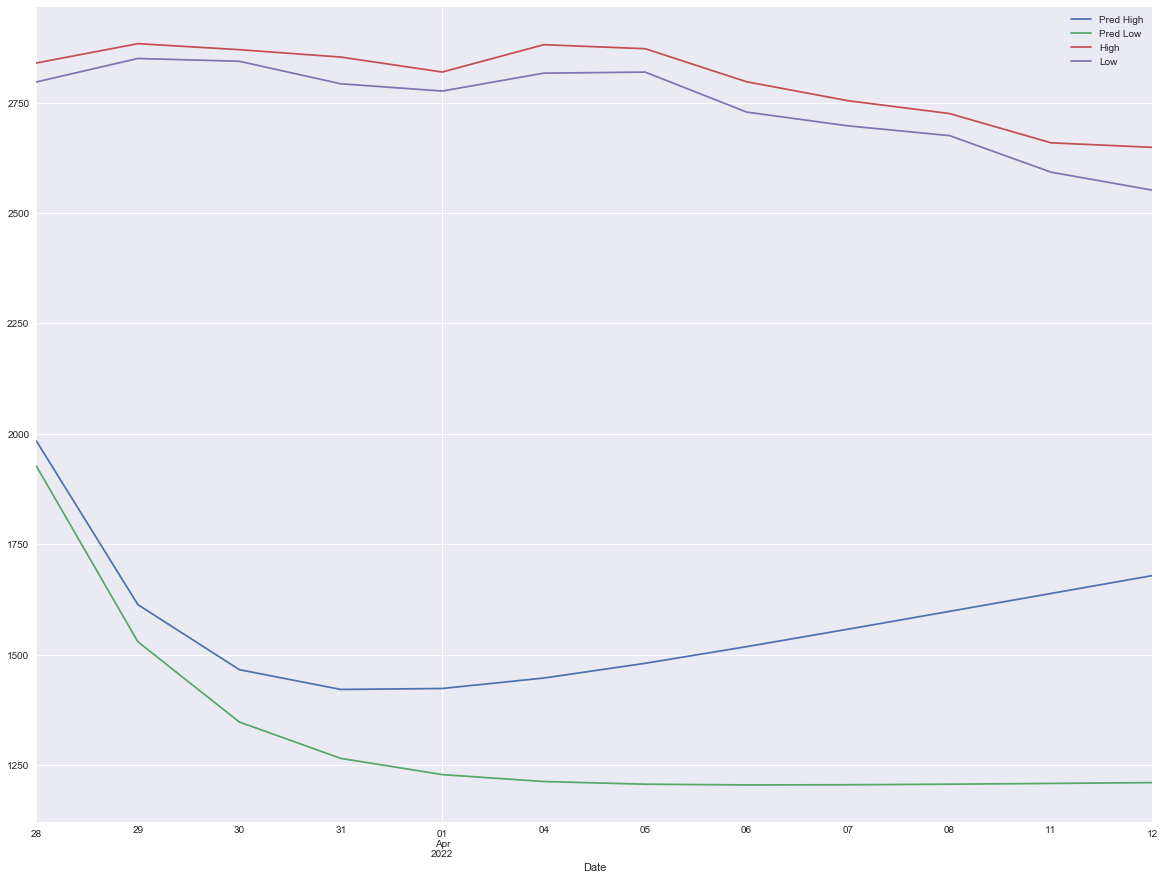

In [33]:
predictions.plot()

In [34]:
#prediction in future 10 days
dates = pd.date_range(start=df.index[-1], periods=11)[1:]

future = 10
forecast = fitted.get_prediction(start=len(df), end=len(df)+future-1)
forecast = forecast.predicted_mean
forecast.set_index(dates, inplace=True)

d:\Users\kaasa\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


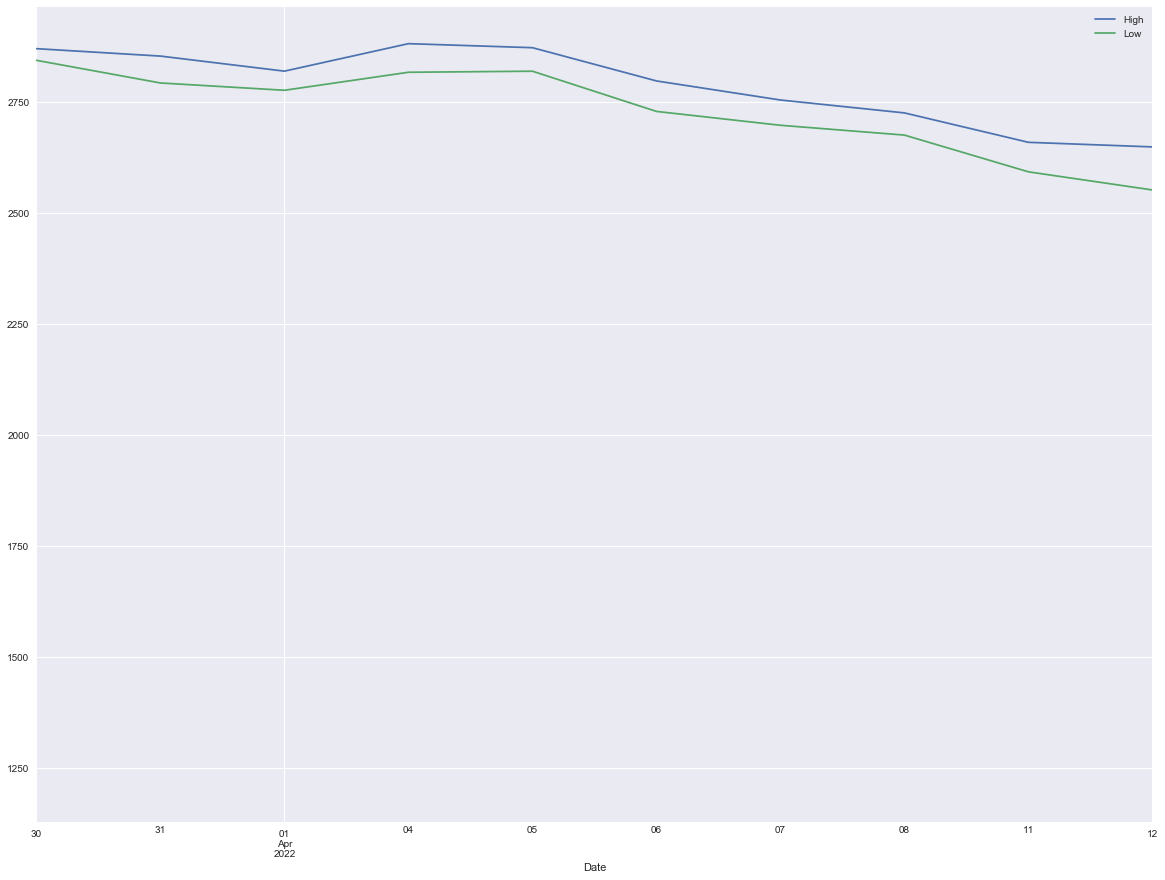

In [35]:
df[-10:].plot()
plt.plot(forecast)

That seems like terrible forecast. But we shall improve the model and see if it can help us, which is for the next time. Thanks.